# Visualization exploration: Data Collection & Net Positive tweet counts

##  1/4 Prep

In [9]:

# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'data.csv' 
# link to data.csv via slack from Yundong: https://ubc-mds.slack.com/files/U016ZA5M5DL/F01ULSG0RF0/final_output.csv
#
#  for te sake of simplicity, keep only 4 fields, then remove others 
df = pd.read_csv("data.csv")
# Preview the first 5 lines of the loaded data 
df.head()
# in sentiment, 2 = positive, 0 = negative

,tweet_id,tweet_date,country,sentiment
0,1.256200e+18,05/01/2020,United States,0
1,1.256840e+18,05/03/2020,United States,2
2,1.257820e+18,05/05/2020,United States,0
3,1.258280e+18,05/07/2020,United States,2
4,1.258620e+18,05/08/2020,United States,2


In [151]:
# convert date column to datetime type
df['tweet_date'] = pd.to_datetime(df['tweet_date'], infer_datetime_format=True)
# extract month column
df['month'] = pd.DatetimeIndex(df['tweet_date']).month
# peek
df.tail()

,tweet_id,tweet_date,country,sentiment,month
62285,1.227490e+18,2020-02-12,United States,2,2
62286,1.227650e+18,2020-02-12,United States,2,2
62287,1.229880e+18,2020-02-18,United States,2,2
62288,1.231030e+18,2020-02-22,United States,2,2
62289,1.223810e+18,2020-02-02,United States,0,2


##  2/4 Visualize data collection: tweets by month

In [154]:
# count tweets by month
tmp_df = df['tweet_id'].groupby([df.month]).agg('count')
tmp_df.reset_index()

,month,tweet_id
0,1,8873
1,2,13759
2,3,26090
3,4,9835
4,5,3733


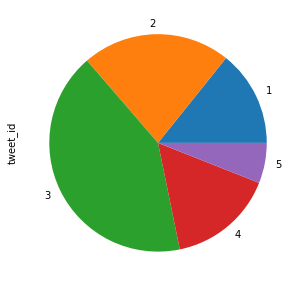

In [155]:
plot = tmp_df.plot.pie(y='tweet_id', figsize=(5, 5))

Above is just for demostration. 

In fact, once we have the data, it might be easier to use excel to draw a pie and paste it in the slide.

## 3/4 Visualize "net positive tweet count" by date

Net Positive Count = Number of Positive Tweets - Number of Negative Tweets

In [142]:
# group 
df_st = df['tweet_id'].groupby([df.tweet_date,df.sentiment]).agg('count')
df_st = df_st.reset_index()
df_st

,tweet_date,sentiment,tweet_id
0,2020-01-01,0,52
1,2020-01-01,2,242
2,2020-01-02,0,52
3,2020-01-02,2,171
4,2020-01-03,0,70
...,...,...,...
261,2020-05-10,2,139
262,2020-05-11,0,30
263,2020-05-11,2,49
264,2020-05-12,0,6


In [143]:
# reverse sign
df_st.loc[df_st.sentiment == 0, 'tweet_id'] = -df_st.tweet_id
df_st.rename(columns={'tweet_id':'net_positive_count'}, inplace=True)
df_st

,tweet_date,sentiment,net_positive_count
0,2020-01-01,0,-52
1,2020-01-01,2,242
2,2020-01-02,0,-52
3,2020-01-02,2,171
4,2020-01-03,0,-70
...,...,...,...
261,2020-05-10,2,139
262,2020-05-11,0,-30
263,2020-05-11,2,49
264,2020-05-12,0,-6


In [156]:
# Get net value 
df2 = df_st['net_positive_count'].groupby([df_st.tweet_date]).agg('sum')
df2

tweet_date
2020-01-01    190
2020-01-02    119
2020-01-03    119
2020-01-04     94
2020-01-05    207
             ... 
2020-05-08    132
2020-05-09    101
2020-05-10     90
2020-05-11     19
2020-05-12     31
Name: net_positive_count, Length: 133, dtype: int64

In [157]:
# Clean up 
df2.drop(columns=['sentiment'])
df2 = df2.reset_index()
df2['tweet_date']= pd.to_datetime(df2['tweet_date'])


(array([737425., 737446., 737456., 737477., 737485., 737506., 737516.,
        737537., 737546.]), <a list of 9 Text major ticklabel objects>)

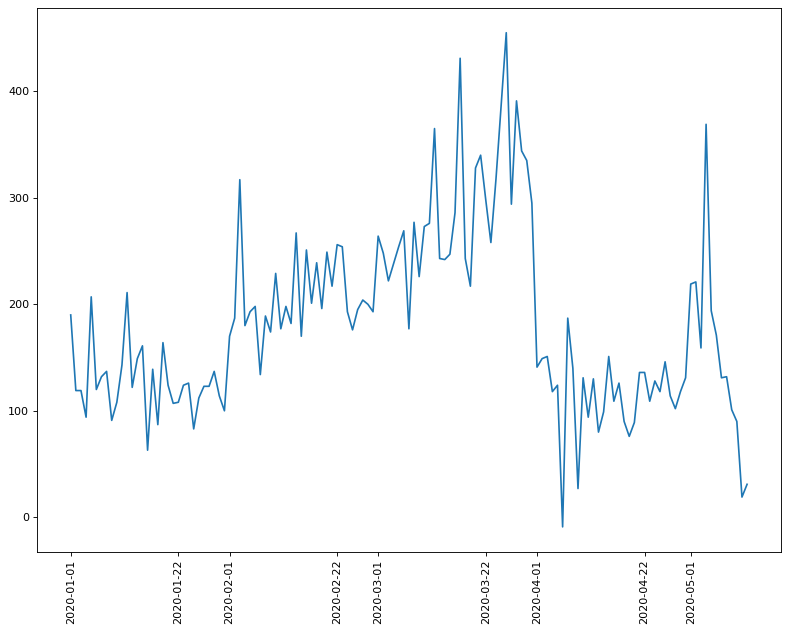

In [173]:
# Viz
import matplotlib. pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 9), dpi=80)

plt.plot(df2['tweet_date'], df2['net_positive_count'])
plt.xticks(rotation='vertical')



## Compare it with covid cases 

> As shown above, tet positive tweets dropped sharply in `Early April`.
>
> Which is around the same time when new cases per day in the US increased a lot.

See below:




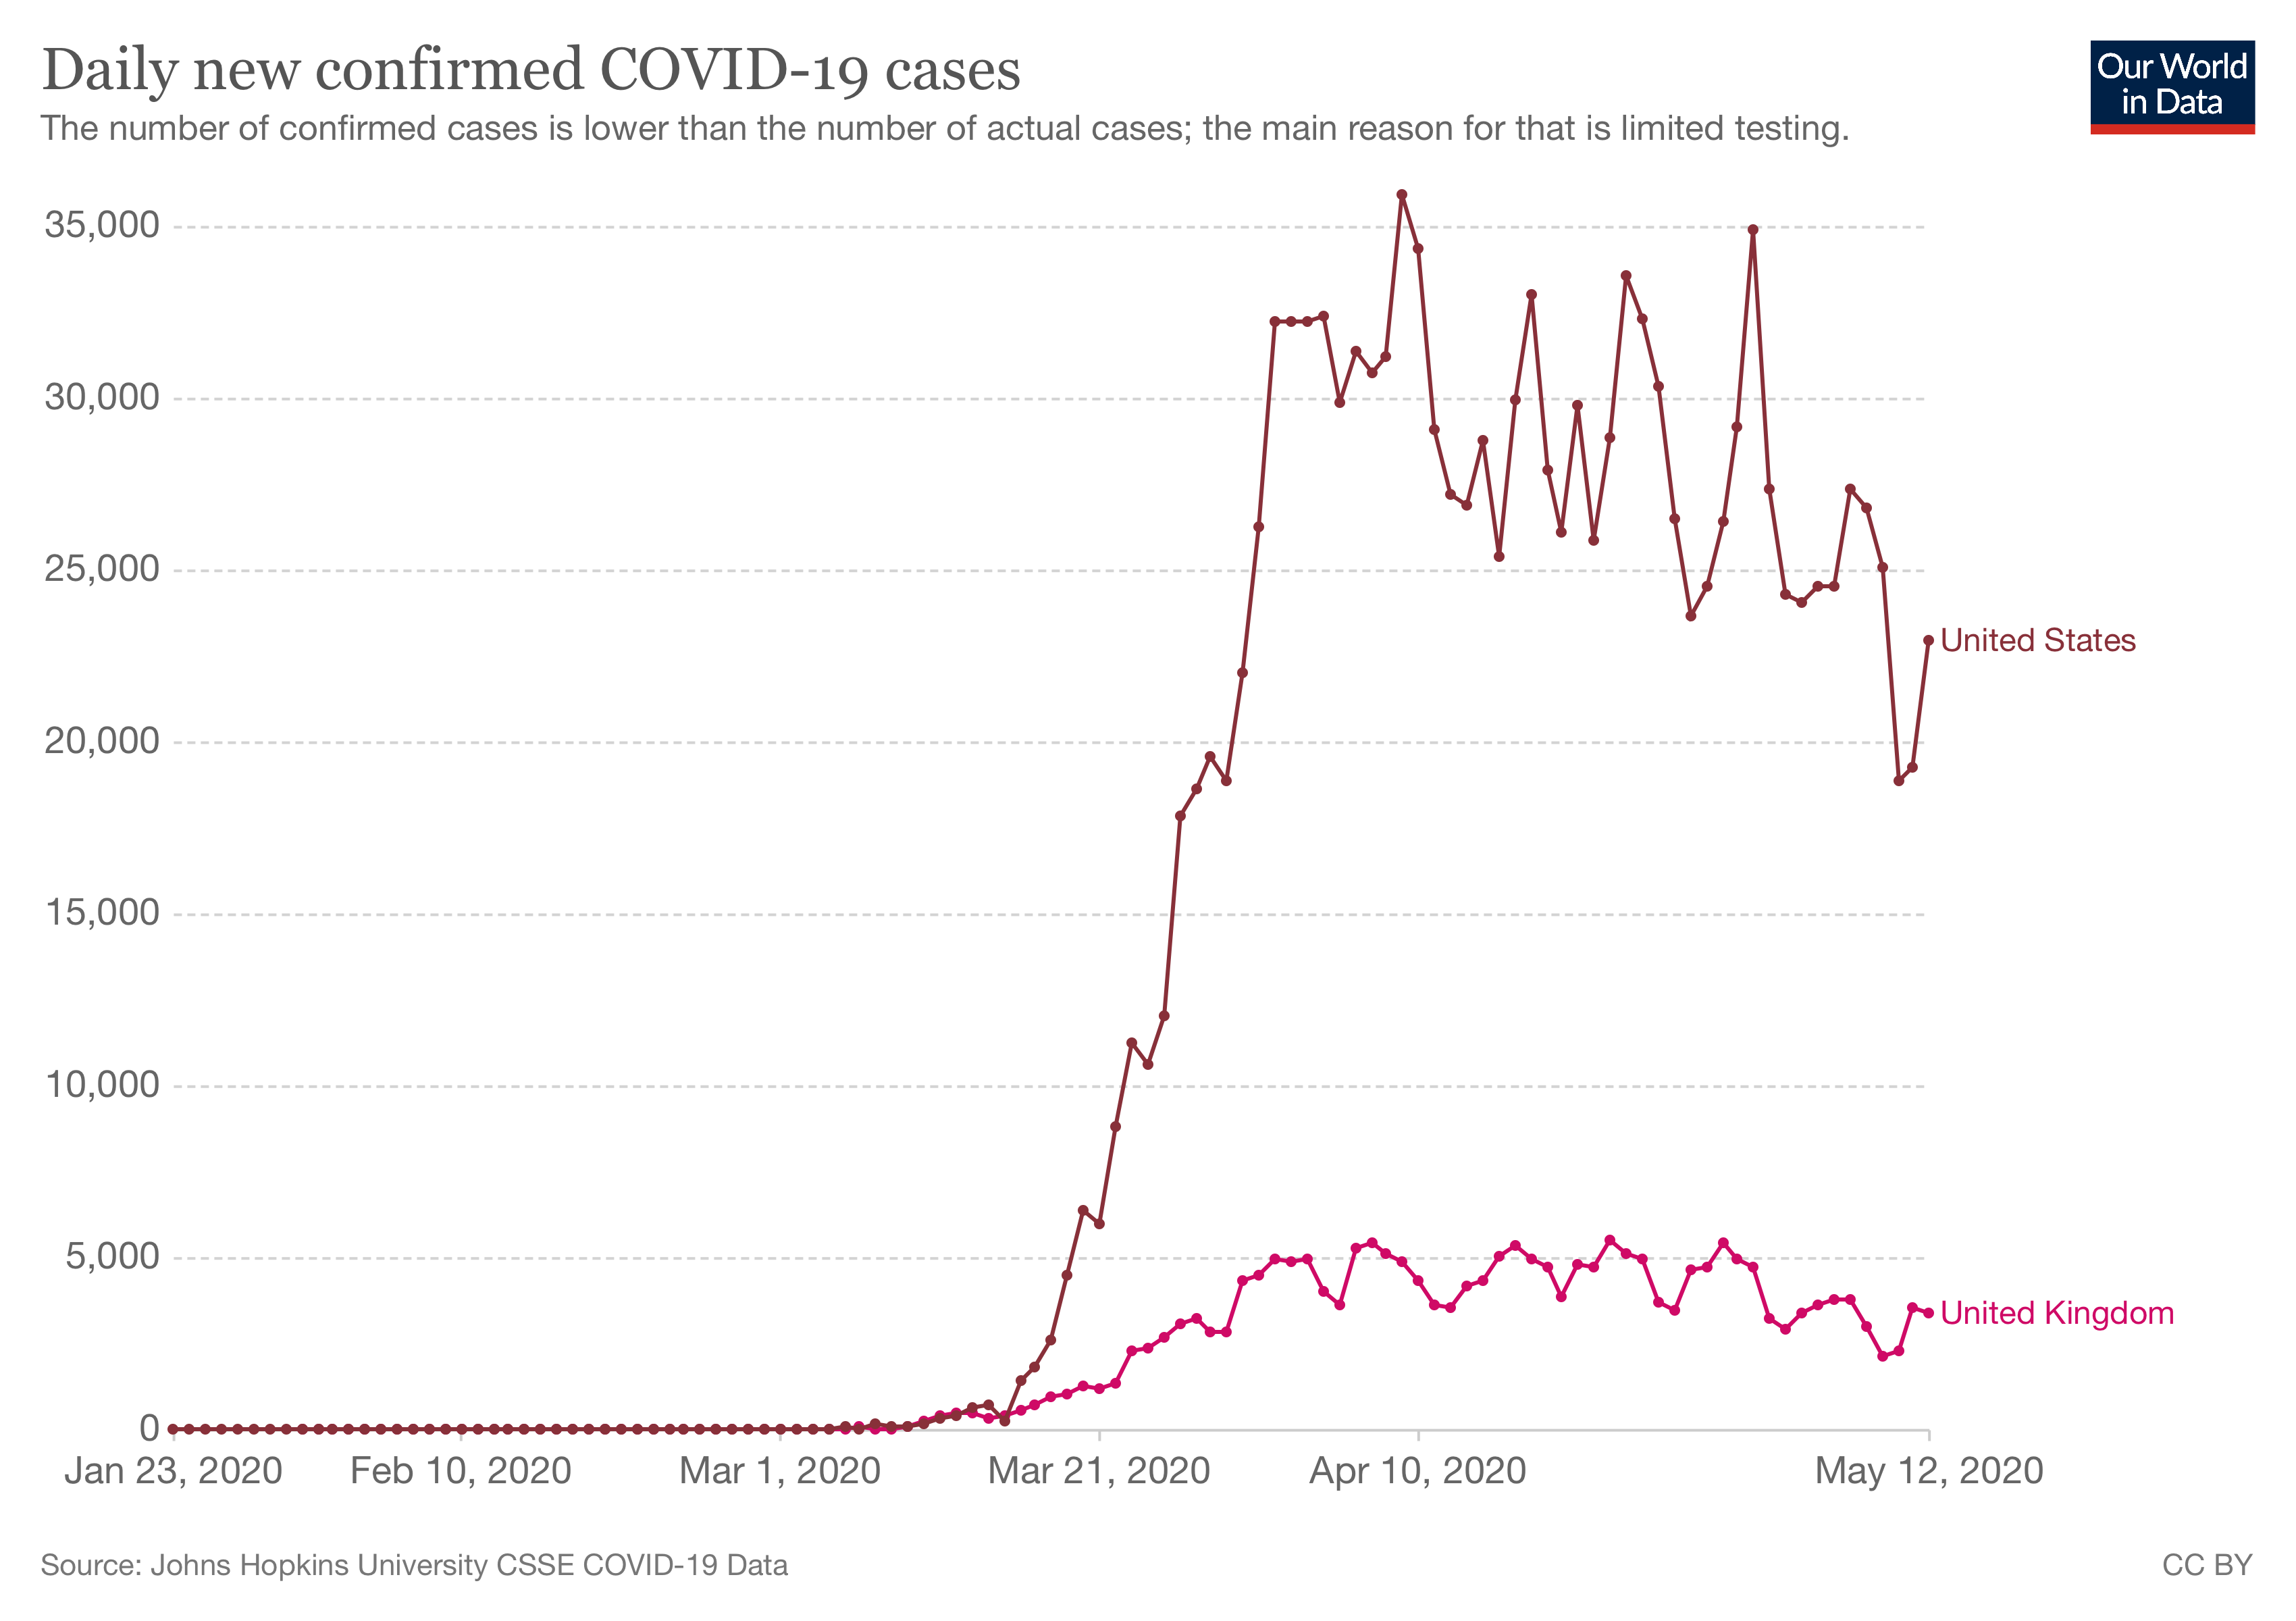

In [8]:

from IPython.display import Image
Image('./covid.png')



[Graph source](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=earliest..2020-05-12&pickerSort=desc&pickerMetric=new_cases_smoothed_per_million&Metric=Confirmed+cases&Interval=New+per+day&Relative+to+Population=false&Align+outbreaks=false&country=USA~GBR)



## 4/4 What's NEXT (TO-DO items) re: visualization in this direction
It seems possible to pinpoint the two (`net positive count` vs `covid cases`) side by side, e.g. in the same dataframe/plot. If anyone wants to contribute, they can get the data of covid cases of 8 countries here:

https://ourworldindata.org/covid-cases